### 2019 SG401 - Oculus Glider (Quick Look)

- Data is hosted on Pavlof (netcdf) and downdraft (erddap)

- Deployed from Dyson at:
    + Data Prior to April 20th is test data from Puget Sound

--
Tested with Python >= 3.6

In [25]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
import GliderDataLoader
import cmocean
import numpy as np

import datetime

In [26]:
sg401=GliderDataLoader.erddap_glider('sg401')
sg401.list_data(verbose=True)

0     sg401_2019_aanderaa
1      sg401_2019_wetlabs
2      sg401_EcoFOCI_2019
3    sg401_b9ae_ed68_1861
Name: Dataset ID, dtype: object


In [27]:
variables = {'sg401_EcoFOCI_2019':['profileid',
                     'latitude', 
                     'ctd_depth', 
                     'longitude', 
                     'salinity',
                     'density', 
                     'time', 
                     'temperature'],
                     'sg401_2019_wetlabs':['time',
                     'wlbb2fl_FL1sig',
                     'wlbb2fl_sig695nm_adjusted',
                     'wlbb2fl_sig470nm_adjusted', 
                     'wlbb2fl_sig700nm_adjusted', 
                     'wlbb2fl_temp',
                     'profileid_wetlabs'],
                     'sg401_2019_aanderaa':['time',
                     'aanderaa4330_dissolved_oxygen',
                     'aa4330_airsat',
                     'aa4330_temp']}
#sg401.constrain_data(start_date='2019-04-18T00:00:00Z',variables=variables)
sg401.constrain_data(start_date=(datetime.datetime.today()-datetime.timedelta(days=7)).strftime('%Y-%m-%dT00:00:00Z'),variables=variables)
dfs = sg401.load_data()

sg401_2019_aanderaa
sg401_2019_wetlabs
sg401_EcoFOCI_2019


## Quick Stats/Summary

In [39]:
print("Last run {0}".format(datetime.datetime.now()))
print("Number of Dives: {0}".format(dfs['sg401_EcoFOCI_2019'].profileid.max()))

Last run 2019-05-06 08:00:46.715997
Number of Dives: 516


## Timeseries plots
- plot last 7 days of data

In [28]:
data_window = dfs['sg401_EcoFOCI_2019'][(datetime.datetime.today()-datetime.timedelta(days=7)).strftime('%Y-%m-%d'):]

(<Figure size 1224x144 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11f611128>)

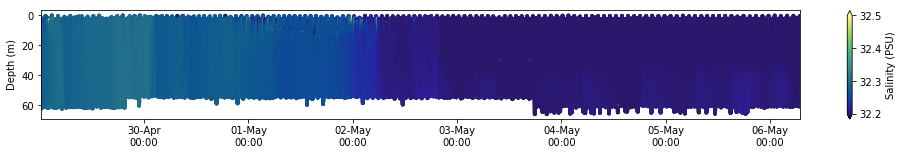

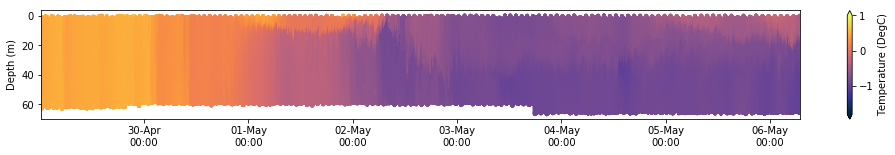

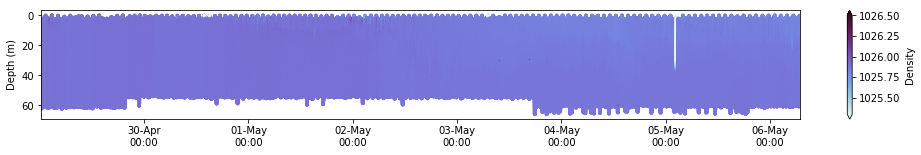

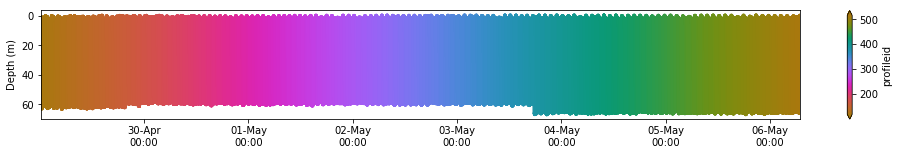

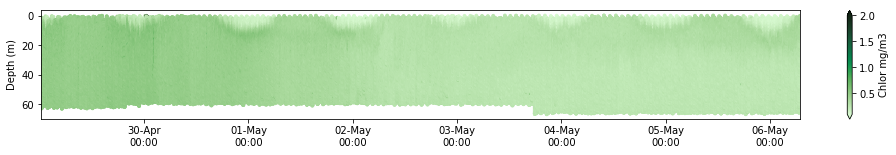

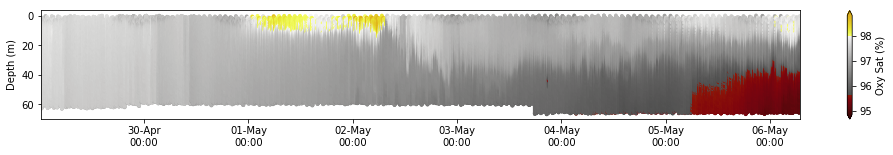

In [29]:
sg401.plot_timeseries(data_window.sort_index(), 'salinity (PSU)','Salinity (PSU)',cmocean.cm.haline,vmin=32.2,vmax=32.5)

sg401.plot_timeseries(data_window.sort_index(), 'temperature (degrees_Celsius)','Temperature (DegC)',vmin=-1.8,vmax=1)

sg401.plot_timeseries(data_window.sort_index(), 'density (g/m^3)','Density',cmocean.cm.dense,vmin=1025.3,vmax=1026.5)

sg401.plot_timeseries(data_window.sort_index(), 'profileid','profileid',cmocean.cm.phase)

### depth needs to be downsampled to the other database freqencyies to plot chlor/oxy

dfwet = dfs['sg401_2019_wetlabs'].join(dfs['sg401_EcoFOCI_2019'])
dfaan = dfs['sg401_2019_aanderaa'].join(dfs['sg401_EcoFOCI_2019'])


#quick QC
dfaan.aa4330_airsat[dfaan.aa4330_airsat < 0] =np.nan
#correct data if calculated isn't available
darkCounts = 47
scaleFactor = 0.012
dfwet['wlbb2fl_FL1sig_mc'] = scaleFactor*(dfwet['wlbb2fl_FL1sig'] - darkCounts)


sg401.plot_timeseries(dfwet[(datetime.datetime.today()-datetime.timedelta(days=7)).strftime('%Y-%m-%d'):], 
                      'wlbb2fl_FL1sig_mc','Chlor mg/m3',cmocean.cm.algae,vmin=0.1,vmax=2)

sg401.plot_timeseries(dfaan[(datetime.datetime.today()-datetime.timedelta(days=7)).strftime('%Y-%m-%d'):],
                      'aa4330_airsat','Oxy Sat (%)',cmocean.cm.oxy)

## waterfall plots
- plot last 24 hours of data

In [32]:
data_window = dfs['sg401_EcoFOCI_2019'][(datetime.datetime.today()-datetime.timedelta(days=1)).strftime('%Y-%m-%d'):]

### depth needs to be downsampled to the other database freqencyies to plot chlor/oxy

dfwet = dfs['sg401_2019_wetlabs'].join(data_window)
dfaan = dfs['sg401_2019_aanderaa'].join(data_window)


#quick QC
dfaan.aa4330_airsat[dfaan.aa4330_airsat < 0] =np.nan
#correct data if calculated isn't available
darkCounts = 47
scaleFactor = 0.012
dfwet['wlbb2fl_FL1sig_mc'] = scaleFactor*(dfwet['wlbb2fl_FL1sig'] - darkCounts)



(<Figure size 576x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120ded278>)

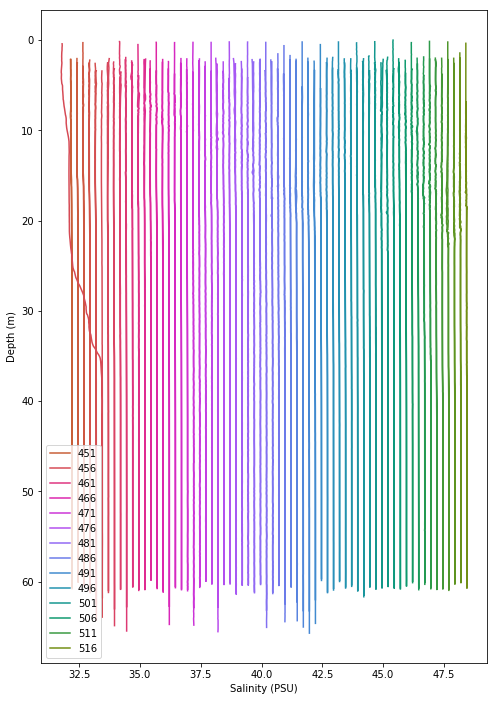

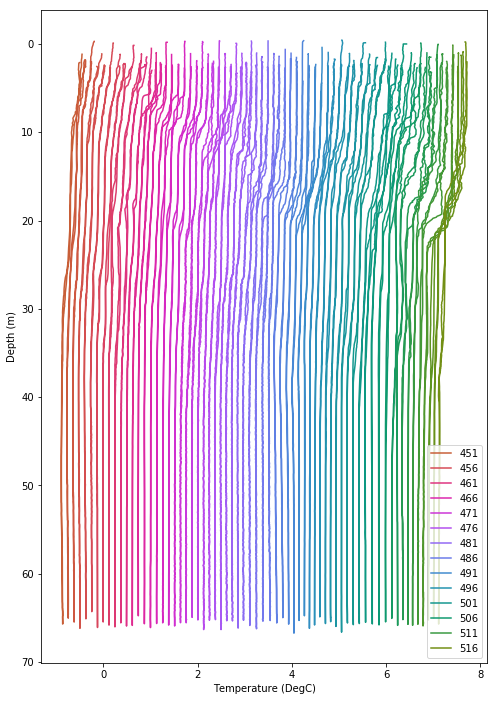

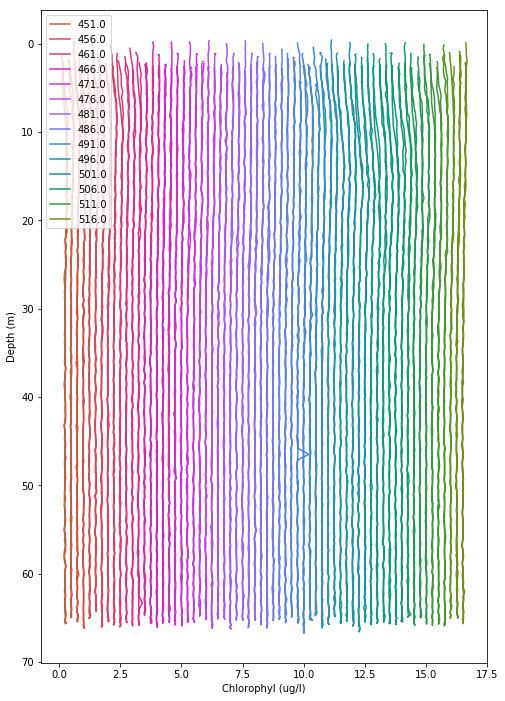

In [33]:
dfg = data_window.groupby('profileid')
dfwg = dfwet.groupby('profileid')

sg401.plot_waterfall(dfg, 'salinity (PSU)','Salinity (PSU)',.25)
sg401.plot_waterfall(dfg, 'temperature (degrees_Celsius)','Temperature (DegC)',.125)
sg401.plot_waterfall(dfwg, 'wlbb2fl_FL1sig_mc','Chlorophyl (ug/l)',.25)